<a href="https://colab.research.google.com/github/wangbolucky/wangbolucky.github.io/blob/master/1_%E7%BB%88%E7%89%88%E9%9B%86%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####<font color=yellow>1.数据加载前的准备条件
<font size=2>1.1加载google云盘 
><font size=1>每次重新打开都要重新加载并确认 

<font size=2>1.2加载包或模块

<font size=2>1.3设置中文字体
><font size=1>中文字体需要先导入再在作图时引用 


In [2]:
!fc-list:lang=zh  #判定虚拟机里是否有中文字体

/bin/bash: fc-list:lang=zh: command not found


In [3]:
#1.装载google云盘
from google.colab import drive
drive.mount('/content/drive')



#2.包加载
import pandas as pd
import numpy as np
!Pip install -q matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

#3.字体加载
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf"
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False #用来显示正负号


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/bin/bash: Pip: command not found
--2019-11-19 10:53:55--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]  

####<font color=yellow> 2.数据的加载&整理 
<font size=2>2.1 加载文件

<font size=2>2.2 数据整理

* <font size=1>2.2.1 字段格式修改

In [0]:
data_kpi=pd.read_excel('/content/drive/My Drive/3.Python/1.colab/客服中心KPI日报.xlsx',
                       sheet_name='日报',header=0) #header=0 代表首行是标题
data_kpi.head(5).style
#删除多余列
del data_kpi['记录工单量']
#data_kpi.drop(data_kpi['记录工单量'],axis=1,inplace=True)

In [5]:
##列格式设置
#显示列属性
print(data_kpi.info()) #还可以用dtypes ,不过info展示更多信息，count量，是否包含null值
#修改某列列名
data_kpi.rename(columns={'坐席工号':"坐席id"},inplace=True) #不加inplace不实际修改
#修改某列字段类型 
data_kpi['坐席id']=data_kpi['坐席id'].astype(object)
#data_kpi['占用率']=data_kpi['占用率'].str.strip("%").astype(float)/100 #python本身不支持百分比的计算，需要转换
data_kpi['日期']=pd.to_datetime(data_kpi['日期']) #日期格式最好用日期函数转换
#显示某列的唯一值
print(data_kpi['渠道'].drop_duplicates())

#筛选满足需要条件的数据
df1=data_kpi[data_kpi['渠道']!='其他-人员系统']
#按列排序
df1.sort_values(['日期','职场'],inplace=True,ascending=True) #默认倒序排列
df1.describe().style
df1.head(3).style

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 14 columns):
日期       1625 non-null object
职场       1625 non-null object
姓名       1625 non-null object
MIS账号    1625 non-null object
坐席工号     1625 non-null int64
CPD      1625 non-null float64
占用率      1625 non-null object
领取量      1625 non-null int64
完成量      1625 non-null int64
性别       1625 non-null object
客服性质     1625 non-null object
员工性质     1625 non-null object
职位       1625 non-null object
渠道       1625 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 177.9+ KB
None
0         电话
1    其他-人员系统
Name: 渠道, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,日期,职场,姓名,MIS账号,坐席id,CPD,占用率,领取量,完成量,性别,客服性质,员工性质,职位,渠道
20,2019-07-04 00:00:00,七星成都,成都申诉-付晓华,huxiaohua_v,87478,165.92,15.83%,93,213,女,CSR(二线),业务外包-BPO,投诉专员,电话
21,2019-07-04 00:00:00,七星成都,成都申诉-刘玉婷1,liuyuting1_v,87486,171.32,10.85%,92,220,女,CSR(二线),业务外包-BPO,投诉专员,电话
22,2019-07-04 00:00:00,七星成都,成都申诉-周琴3,zhouqin3_v,86468,146.37,15.44%,106,194,女,CSR(二线),业务外包-BPO,投诉专员,电话


####<font color=yellow> 3.描述统计 
<font size=2>3.1 频数统计
><font size=1>如果只是简单的统计，可以直接使用汇总函数  
><font size=1>如果需要对列进行多种汇总统计，需要用agg  
><font size=1>如果需要跨列运算，需要用apply apply可以应用自定义函数，可以做更复杂的应用



In [6]:
# 频数统计
df2=df1[['日期','职场','领取量','完成量']]
df2[['职场','完成量']].groupby(by=['职场']).sum()

,完成量
职场,
七星成都,47903
泰盈成都,40325
长沙自建,35046


In [7]:
#同时应用多个统计函数 agg()
df2.groupby(by='日期').agg({'职场':'count','完成量':['sum',np.min,np.max]})

职场    完成量          
           count    sum amin amax
日期                               
2019-07-04   211  15697    1  261
2019-07-05   218  19021    1  461
2019-07-06   161  14302    2  500
2019-07-07   194  13837    1  252
2019-07-08   193  13342    2  263
2019-07-09   208  15631    1  325
2019-07-10   228  15122    1  334
2019-07-11   211  16322    1  359

In [8]:
#跨列运算 apply
def des(x):
  return x['完成量'].sum()/x['职场'].count()
  #return x['完成量'].std()/x['完成量'].mean()
df2.groupby(by='日期').apply(des) #这样使用两列计算出来了cpd

日期
2019-07-04    74.393365
2019-07-05    87.252294
2019-07-06    88.832298
2019-07-07    71.324742
2019-07-08    69.129534
2019-07-09    75.149038
2019-07-10    66.324561
2019-07-11    77.355450
dtype: float64

<font size=2>3.2描述统计
><font size=1>describe 基本涵盖了主要统计指标  描述统计只针对数值性字段有效 
><font size=1> 需要补充的指标有中位数，众数，

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CPD,1624.0,68.205560,73.219449,5.0,21.2825,36.74,127.4525,1184.81
领取量,1624.0,68.955049,137.106355,0.0,20.0000,40.00,81.0000,2526.00
完成量,1624.0,75.907635,79.729441,1.0,20.0000,37.00,150.0000,500.00


In [10]:
from  scipy import stats  #众数获取
df2.groupby('职场').agg(['median','mean',stats.mode])


领取量                              完成量                           
     median        mean          mode median        mean           mode
职场                                                                     
七星成都     90  115.530612  ([83], [14])    194  195.522449   ([203], [9])
泰盈成都     90  113.561265  ([84], [10])    170  159.387352  ([201], [11])
长沙自建     30   48.798401   ([0], [44])     28   31.124334   ([10], [43])

<font size=4>

####<font color=yellow >4.正态性检验  
<font size=2 >数据是否符合正态性是很多方法（如回归，方差，T检验等）的分析基础；  
正态性检验是一种非参数检验，利用与标准正态分布的差异性来判定是否拒绝HO假设；  
常规检验方法：  
1. <font color=lightgrey>  直方图直观查看
2. 通过PP图或者QQ图
3. 通过p值查看




20    七星成都
3     泰盈成都
0     长沙自建
Name: 职场, dtype: object


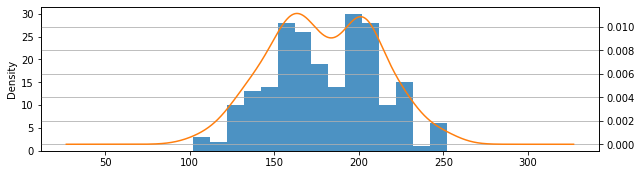

In [11]:
#通过直方图查看
print(df1['职场'].drop_duplicates())
zt_data=df1[(df1['职场']=='泰盈成都')&(df1['完成量']>90)]
zt_data.head().style

fig=plt.figure(figsize=(10,9)) #创建画布
ax1=fig.add_subplot(3,1,1) #创建三个图床，每层一个，并把ax1绘制在第一个图床上
zt_data['完成量'].hist(bins=15,alpha=0.8,ax=ax1) #在图床1上创建一个15个分块的直方图,透明度为50%
zt_data['完成量'].plot(kind='kde',secondary_y=True,ax=ax1) #绘制概率密度图，放置在第二个y轴上显示
plt.grid()  #显示网格


In [12]:
#通过计算p值
from scipy import stats

zt_mean=zt_data['完成量'].mean()
zt_std=zt_data['完成量'].std()
stats.kstest(zt_data['完成量'],'norm',(zt_mean,zt_std))  #stats.kstest(待检查的数据，检验方法-这里使用正态，（均值，标准差)）
#这里返回的p<0.05 拒接HO假设：满足正态分布，因此不满足正态分布



KstestResult(statistic=0.09647193087449046, pvalue=0.03168125877121062)

#### <font color=yellow> 4.差异关系-卡方检验
<font size=2> 卡方检验是对一组或两组定类数据之间是否有差异性的检验；  
详细解释：[卡方分布](https://www.cnblogs.com/Yuanjing-Liu/p/9252844.html)


<font size=2>卡方检验可做两类检验：  
1.独立性检验：两类字段是否相互独立，比如不同公司的男女比例是否有差异；  
2.适度性检验：某组字段是否和理论数值有明显差异； 


<font size=2>前提：在进行分析之前，需要明确HO假设是什么；最常用的卡方检验方法是person检验，一般要求满足正态分布及样本量应>5

In [13]:
#卡方分析

#假如想知道不同职场的男女比例是否有明显差异，这里我们假设H0不同职场的男女比例没有明显差异
df_chisquare=df1[df1['日期']=='2019-07-04'].copy()
print(df_chisquare.info())
tb=pd.pivot_table(df_chisquare,values='日期',columns=['性别'],index='职场',aggfunc='count')
print(tb)

#独立性检验:检测不同职场的男女比例是否有明显差异
from scipy.stats import chi2_contingency
d = np.array([[25,23,114], [7,10,32]])
print(chi2_contingency(d)) #输出的指标分别为1.卡方值，2.p值 ，3.自由度，4.理论频数


#适度性检验:检测男女比例是否有明显差异
from scipy import stats
sj = [25,30]
ll = [27.5,27.5]  #这里是理论频数，通常大部分的H0都是无区别，因此这里认为男女人数应该分别是25+30/2
print(stats.chisquare(sj, f_exp = ll)) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 20 to 211
Data columns (total 14 columns):
日期       211 non-null datetime64[ns]
职场       211 non-null object
姓名       211 non-null object
MIS账号    211 non-null object
坐席id     211 non-null object
CPD      211 non-null float64
占用率      211 non-null object
领取量      211 non-null int64
完成量      211 non-null int64
性别       211 non-null object
客服性质     211 non-null object
员工性质     211 non-null object
职位       211 non-null object
渠道       211 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 24.7+ KB
None
性别      女   男
职场           
七星成都   25   7
泰盈成都   23  10
长沙自建  114  32
(1.0998714001574672, 0.5769869094005882, 2, array([[ 24.56872038,  25.33649289, 112.09478673],
       [  7.43127962,   7.66350711,  33.90521327]]))
Power_divergenceResult(statistic=0.45454545454545453, pvalue=0.5001842570707943)


##### <font color=yellow>5.差异关系-方差分析
<font size=2> 适用范畴：定类(x）与定量(y）  
举例：不同地区的消费水平或收入是否有差异  
